In [50]:
import numpy as np
import pandas as pd


import os
import glob

# 定义文件夹路径
folder_path = r'D:/CODE/MCM/2025-C/C/Data2/olympic_DBSCAN_clustered_results'

# 获取所有csv文件路径
csv_files = glob.glob(os.path.join(folder_path, '*.csv'))

# 读取并统计所有csv文件的行数
df_list = []
min_rows = 100  # 设置最小行数阈值
file_stats = []  # 用于存储文件路径和行数

for file in csv_files:
    df = pd.read_csv(file)
    row_count = len(df)
    file_stats.append((file, row_count))  # 存储文件路径和行数
    if row_count >= min_rows:  # 只有当文件行数大于等于阈值时才保留
        df_list.append(df)

# 计算并输出文件行数统计及中位数
print("文件行数统计：")
counts = []
for file, count in file_stats:
    print(f"{file}: {count} 行")
    counts.append(count)
    
# 计算中位数
median_count = np.median(counts)
print(f"\n文件行数中位数: {median_count} 行")

# 合并所有DataFrame
merged_df = pd.concat(df_list, ignore_index=True)

print(merged_df.head())


文件行数统计：
D:/CODE/MCM/2025-C/C/Data2/olympic_DBSCAN_clustered_results\3x3_Basketball,_Basketball_clustered.csv: 1 行
D:/CODE/MCM/2025-C/C/Data2/olympic_DBSCAN_clustered_results\3x3_Basketball_clustered.csv: 19 行
D:/CODE/MCM/2025-C/C/Data2/olympic_DBSCAN_clustered_results\Aeronautics_clustered.csv: 1 行
D:/CODE/MCM/2025-C/C/Data2/olympic_DBSCAN_clustered_results\Alpinism_clustered.csv: 2 行
D:/CODE/MCM/2025-C/C/Data2/olympic_DBSCAN_clustered_results\Archery_clustered.csv: 503 行
D:/CODE/MCM/2025-C/C/Data2/olympic_DBSCAN_clustered_results\Artistic_Gymnastics_clustered.csv: 96 行
D:/CODE/MCM/2025-C/C/Data2/olympic_DBSCAN_clustered_results\Artistic_Swimming_clustered.csv: 38 行
D:/CODE/MCM/2025-C/C/Data2/olympic_DBSCAN_clustered_results\Art_Competitions_clustered.csv: 126 行
D:/CODE/MCM/2025-C/C/Data2/olympic_DBSCAN_clustered_results\Athletics_clustered.csv: 2477 行
D:/CODE/MCM/2025-C/C/Data2/olympic_DBSCAN_clustered_results\Badminton_clustered.csv: 322 行
D:/CODE/MCM/2025-C/C/Data2/olympic_DBSCAN_cl

In [51]:
# 去除Cluster列为-1的行
merged_df_no_noise = merged_df[merged_df['Cluster'] != -1]


In [52]:
# 导入必要的库
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# 定义特征和目标变量
features = ['Gold Diff (Avg)', 'Medal Diff (Avg)', 'Awarded Athletes Diff (Avg)', 
            'Awarded Athletes Ratio', 'Awarded Athletes Ratio Diff']
targets = ['Gold Count', 'Total Medals']

# 准备数据
X = merged_df_no_noise[features]
y_gold = merged_df_no_noise[targets[0]]
y_medals = merged_df_no_noise[targets[1]]

# 划分训练集和测试集
X_train, X_test, y_gold_train, y_gold_test = train_test_split(X, y_gold, test_size=0.2, random_state=42)
_, _, y_medals_train, y_medals_test = train_test_split(X, y_medals, test_size=0.2, random_state=42)

# 创建Ridge模型
ridge_gold = Ridge(alpha=1.0)
ridge_medals = Ridge(alpha=1.0)

# 训练模型
ridge_gold.fit(X_train, y_gold_train)
ridge_medals.fit(X_train, y_medals_train)

# 预测
gold_pred = ridge_gold.predict(X_test)
medals_pred = ridge_medals.predict(X_test)

# 评估模型
gold_mse = mean_squared_error(y_gold_test, gold_pred)
medals_mse = mean_squared_error(y_medals_test, medals_pred)

print(f"Gold Count预测的均方误差: {gold_mse:.4f}")
print(f"Total Medals预测的均方误差: {medals_mse:.4f}")


Gold Count预测的均方误差: 5.0353
Total Medals预测的均方误差: 13.3992


In [53]:
merged_df_noise = merged_df[merged_df['Cluster'] == -1]

# 对噪声数据进行预测
X_noise = merged_df_noise[features]
pred_gold_noise = ridge_gold.predict(X_noise)
pred_medals_noise = ridge_medals.predict(X_noise)

# 将预测结果添加到DataFrame中
merged_df_noise['pred_Gold Count'] = pred_gold_noise
merged_df_noise['pred_Total Medals'] = pred_medals_noise

# 计算预测值与实际值的差值
merged_df_noise['diff_Gold Count'] =  merged_df_noise['pred_Gold Count'] - merged_df_noise['Gold Count']
merged_df_noise['diff_Total Medals'] =  merged_df_noise['pred_Total Medals'] - merged_df_noise['Total Medals']

# 计算中位数和平均数
gold_diff_min = merged_df_noise['diff_Gold Count'].max()
medals_diff_min = merged_df_noise['diff_Total Medals'].max()

print(gold_diff_min)
print(medals_diff_min)



5.5039801537221305
13.360030083185439


C:\Users\PC\AppData\Local\Temp\ipykernel_33856\1487260421.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df_noise['pred_Gold Count'] = pred_gold_noise
C:\Users\PC\AppData\Local\Temp\ipykernel_33856\1487260421.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df_noise['pred_Total Medals'] = pred_medals_noise
C:\Users\PC\AppData\Local\Temp\ipykernel_33856\1487260421.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

In [54]:
# 创建新的特征和目标变量
X_diff = merged_df_noise[features]
y_gold_diff = merged_df_noise['diff_Gold Count']
y_medals_diff = merged_df_noise['diff_Total Medals']

# 划分训练集和测试集
X_train_diff, X_test_diff, y_gold_train_diff, y_gold_test_diff = train_test_split(X_diff, y_gold_diff, test_size=0.2, random_state=42)
_, _, y_medals_train_diff, y_medals_test_diff = train_test_split(X_diff, y_medals_diff, test_size=0.2, random_state=42)

# 创建Ridge模型
ridge_gold_diff = Ridge(alpha=1.0)
ridge_medals_diff = Ridge(alpha=1.0)

# 训练模型
ridge_gold_diff.fit(X_train_diff, y_gold_train_diff)
ridge_medals_diff.fit(X_train_diff, y_medals_train_diff)

# 预测
gold_diff_pred = ridge_gold_diff.predict(X_test_diff)
medals_diff_pred = ridge_medals_diff.predict(X_test_diff)

# 评估模型
gold_diff_mse = mean_squared_error(y_gold_test_diff, gold_diff_pred)
medals_diff_mse = mean_squared_error(y_medals_test_diff, medals_diff_pred)

print(f"Gold Count差值预测的均方误差: {gold_diff_mse:.4f}")
print(f"Total Medals差值预测的均方误差: {medals_diff_mse:.4f}")


Gold Count差值预测的均方误差: 1.1896
Total Medals差值预测的均方误差: 5.5039


In [55]:
# 过滤出2024年的数据
merged_df_no_noise_2024 = merged_df_no_noise[merged_df_no_noise['Year'] == 2024]

# 使用noise模型预测非噪声数据
pred_gold_no_noise = ridge_gold_diff.predict(merged_df_no_noise_2024[features])
pred_medals_no_noise = ridge_medals_diff.predict(merged_df_no_noise_2024[features])

# 将预测结果保存到DataFrame中
merged_df_no_noise_2024['pred_Gold Count'] = pred_gold_no_noise
merged_df_no_noise_2024['pred_Total Medals'] = pred_medals_no_noise

# 计算预测值与实际值的差值
merged_df_no_noise_2024['diff_Gold Count'] = merged_df_no_noise_2024['pred_Gold Count'] - merged_df_no_noise_2024['Gold Count']
merged_df_no_noise_2024['diff_Total Medals'] = merged_df_no_noise_2024['pred_Total Medals'] - merged_df_no_noise_2024['Total Medals']

# 获取diff_Gold Count前三大值所在行并输出所有属性
print("diff_Gold Count top 3 rows with all attributes:")
top3_gold = merged_df_no_noise_2024.loc[merged_df_no_noise_2024['diff_Gold Count'].nlargest(3).index]
print(top3_gold)

# 获取diff_Total Medals前三大值所在行并输出所有属性
print("\ndiff_Total Medals top 3 rows with all attributes:")
top3_medals = merged_df_no_noise_2024.loc[merged_df_no_noise_2024['diff_Total Medals'].nlargest(3).index]
print(top3_medals)


diff_Gold Count top 3 rows with all attributes:
       Year  NOC      Sport  Participation Count  Award Count  Gold Count  \
8799   2024  GER   Football                   20           20         0.0   
17406  2024  BUL  Taekwondo                    1            1         0.0   
10075  2024  IND     Hockey                   16           16         0.0   

       Total Medals  Gold Diff (Avg)  Medal Diff (Avg)  \
8799           20.0              0.0         -0.666667   
17406           1.0              0.0         -0.666667   
10075          16.0              0.0          0.000000   

       Awarded Athletes Diff (Avg)  Awarded Athletes Ratio  \
8799                     -0.666667                     1.0   
17406                    -0.666667                     1.0   
10075                     0.000000                     1.0   

       Awarded Athletes Ratio Diff  Cluster  pred_Gold Count  \
8799                      0.000000        0         0.587350   
17406                     0.00000

C:\Users\PC\AppData\Local\Temp\ipykernel_33856\2694358482.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df_no_noise_2024['pred_Gold Count'] = pred_gold_no_noise
C:\Users\PC\AppData\Local\Temp\ipykernel_33856\2694358482.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df_no_noise_2024['pred_Total Medals'] = pred_medals_no_noise
C:\Users\PC\AppData\Local\Temp\ipykernel_33856\2694358482.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Tr

In [59]:
# 统计每个Sport中pred_gold > gold的行数
sport_counts = merged_df_no_noise_2024[merged_df_no_noise_2024['pred_Gold Count'] > merged_df_no_noise_2024['Gold Count']].groupby('Sport').size()

# 找到行数最多的Sport
most_common_sport = sport_counts.idxmax()
max_count = sport_counts.max()

print(f"预测金牌数超过实际金牌数最多的运动是: {most_common_sport}, 超过次数: {max_count}")




预测金牌数超过实际金牌数最多的运动是: Swimming, 超过次数: 25


In [56]:
# 8799   2024  GER   Football                   20           20         0.0   0.861251   0.587350
# 17406  2024  BUL  Taekwondo                    1            1         0.0    0.748619  0.587350
# 18216  2024  BEL  Triathlon                    4            0                0.745971  0.567624



SyntaxError: invalid syntax (676181324.py, line 1)

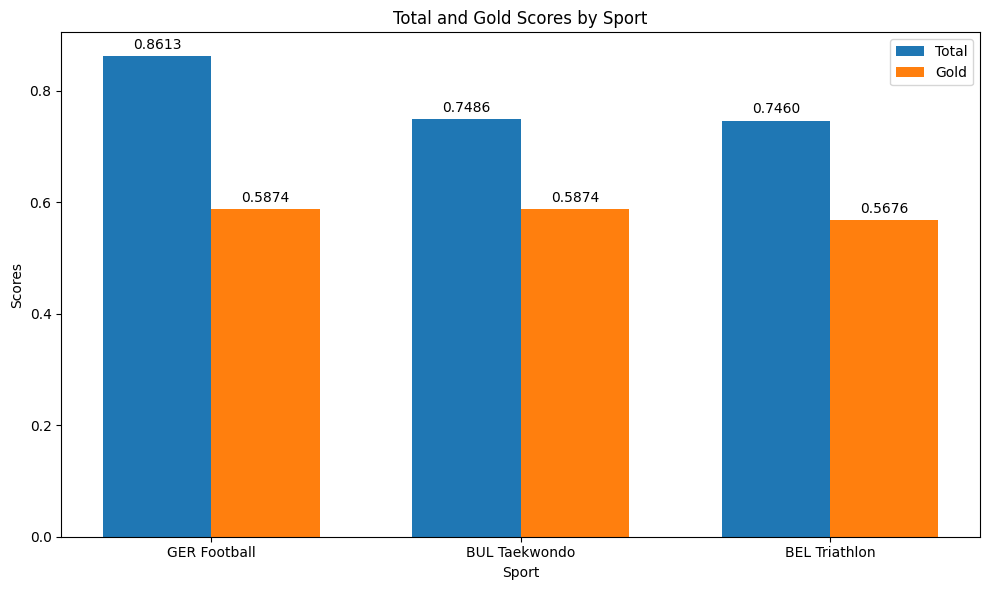

In [58]:
import matplotlib.pyplot as plt
# 创建数据
sports = ['GER Football', 'BUL Taekwondo', 'BEL Triathlon']
total = [0.861251, 0.748619, 0.745971]
gold = [0.587350, 0.587350, 0.567624]

# 设置柱状图位置
x = np.arange(len(sports))
width = 0.35

# 创建图形
fig, ax = plt.subplots(figsize=(10, 6))

# 绘制柱状图
rects1 = ax.bar(x - width/2, total, width, label='Total')
rects2 = ax.bar(x + width/2, gold, width, label='Gold')

# 添加标签、标题等
ax.set_xlabel('Sport')
ax.set_ylabel('Scores')
ax.set_title('Total and Gold Scores by Sport')
ax.set_xticks(x)
ax.set_xticklabels(sports)
ax.legend()

# 在柱子上方添加数值标签
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.4f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.tight_layout()
plt.show()
